In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/rc/Downloads/household_power_consumption.csv')

# Preview the data
print(df.head())

         Date      Time Global_active_power Global_reactive_power Voltage  \
0  16-12-2006  17:24:00               4.216                 0.418  234.84   
1  16-12-2006  17:25:00                5.36                 0.436  233.63   
2  16-12-2006  17:26:00               5.374                 0.498  233.29   
3  16-12-2006  17:27:00               5.388                 0.502  233.74   
4  16-12-2006  17:28:00               3.666                 0.528  235.68   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0             18.4              0              1            17.0  
1               23              0              1            16.0  
2               23              0              2            17.0  
3               23              0              1            17.0  
4             15.8              0              1            17.0  


In [2]:
# Summary of missing values
print(df.isnull().sum())

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
dtype: int64


In [3]:
# Combine and convert with the correct format (using dayfirst=True instead of a strict format)
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')

# Set as index
df.set_index('Datetime', inplace=True)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2006-12-16 17:24:00,16-12-2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
2006-12-16 17:25:00,16-12-2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2006-12-16 17:26:00,16-12-2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
2006-12-16 17:27:00,16-12-2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
2006-12-16 17:28:00,16-12-2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [4]:
# Check for missing values
df.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
dtype: int64

In [5]:
df.dropna(subset=['Sub_metering_3'], inplace=True)

In [6]:
#after dropna, cheking the dataset
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [7]:
# Extracting time-based features
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # 0 = Monday, 6 = Sunday
df['month'] = df.index.month
df['year'] = df.index.year
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)


In [8]:
# 60-minute (1 hour) rolling mean
df['rolling_mean_1h'] = df['Global_active_power'].rolling(window=60).mean()

# 1440-minute (1 day) rolling mean
df['rolling_mean_1d'] = df['Global_active_power'].rolling(window=1440).mean()

In [9]:
df.dropna(inplace=True)

In [10]:
#Checking New Features
df[['Global_active_power', 'hour', 'day_of_week', 'rolling_mean_1h', 'rolling_mean_1d']].head()

,Global_active_power,hour,day_of_week,rolling_mean_1h,rolling_mean_1d
Datetime,,,,,
2006-12-17 17:23:00,3.238,17,6,3.552533,2.487728
2006-12-17 17:24:00,3.39,17,6,3.527967,2.487154
2006-12-17 17:25:00,3.36,17,6,3.502833,2.485765
2006-12-17 17:26:00,3.4,17,6,3.478233,2.484394
2006-12-17 17:27:00,3.396,17,6,3.454667,2.483011


In [11]:
# Drop any remaining rows with NaNs
df.dropna(inplace=True)

# Target variable
y = df['Global_active_power']

# Feature set (you can include more based on what you've created)
X = df[['hour', 'day_of_week', 'month', 'is_weekend', 
        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
        'Voltage', 'Global_intensity']]


In [12]:
#Train-Test Split
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split the data first (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
X_scaler = MinMaxScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Scale the target
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))


In [15]:
#Random Forest Regressor (performs well)
from sklearn.ensemble import RandomForestRegressor

# Use only the first 100,000 rows (adjust as needed)
X_subset = X_train_scaled[:100000]
y_subset = y_train_scaled[:100000].ravel()

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_subset, y_subset)


RandomForestRegressor(random_state=42)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on scaled test data
y_pred_scaled = model_rf.predict(X_test_scaled)

# Inverse scale predictions
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_actual = y_scaler.inverse_transform(y_test_scaled)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


RMSE: 0.0353
MAE: 0.0195
R²: 0.9990


In [17]:
# Predict (assuming model_rf is trained on scaled data)
y_pred_scaled = model_rf.predict(X_test_scaled)

# Inverse scale the prediction and test set
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_actual = y_scaler.inverse_transform(y_test_scaled)


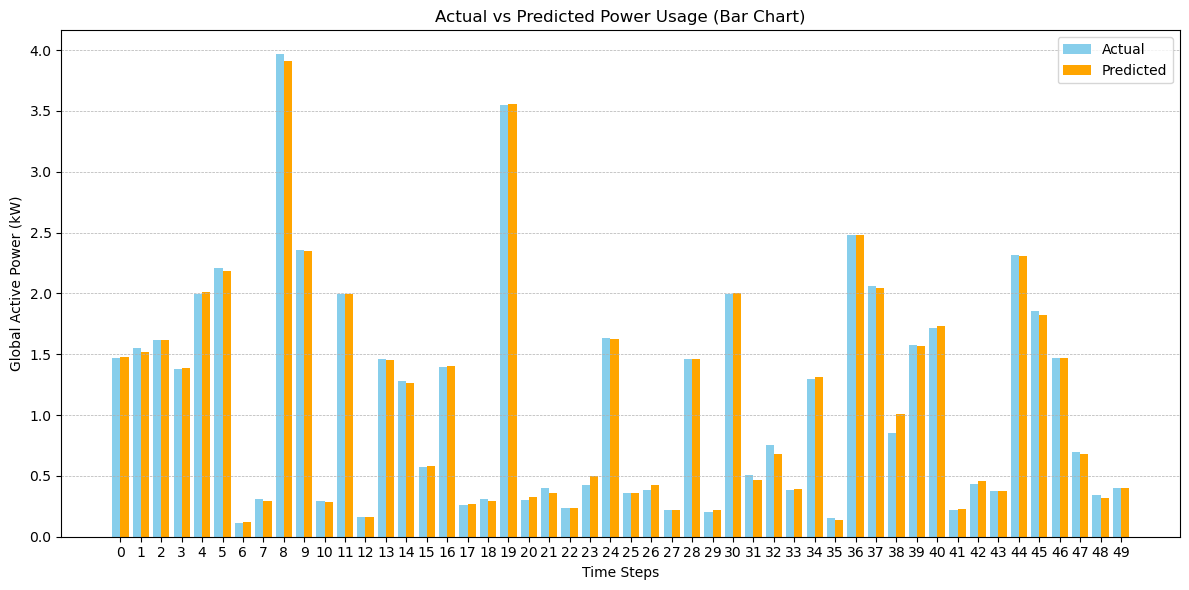

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Select first 50 values
n = 50
x = np.arange(n)

plt.figure(figsize=(12, 6))

# Bar chart for actual values
plt.bar(x - 0.2, y_test_actual[:n].flatten(), width=0.4, label='Actual', color='skyblue')

# Bar chart for predicted values
plt.bar(x + 0.2, y_pred[:n].flatten(), width=0.4, label='Predicted', color='orange')

plt.title('Actual vs Predicted Power Usage (Bar Chart)')
plt.xlabel('Time Steps')
plt.ylabel('Global Active Power (kW)')
plt.xticks(ticks=x, labels=x)
plt.legend()
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


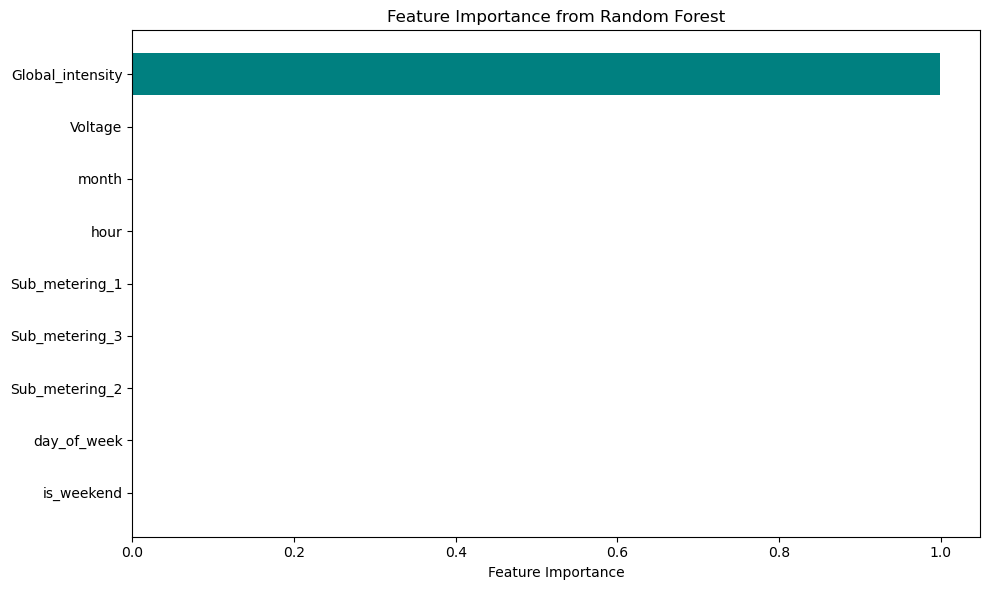

In [19]:
#Understand which features contribute most to power prediction.
import pandas as pd

importances = model_rf.feature_importances_
feature_names = X.columns  # Use original feature names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


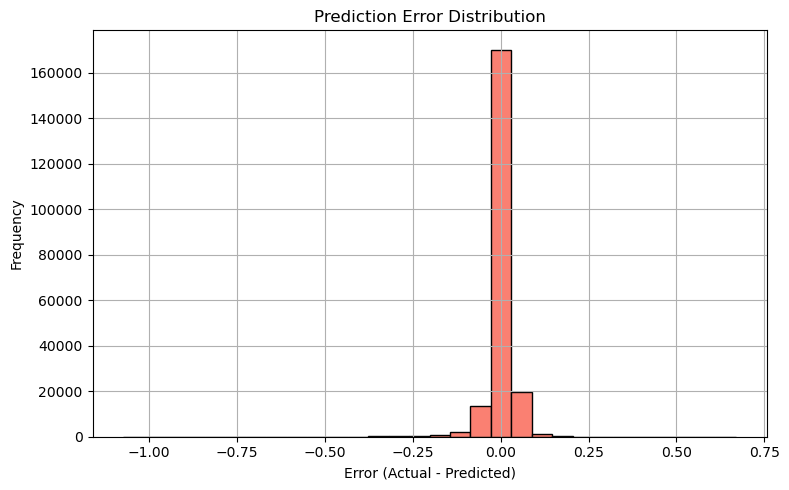

In [20]:
#See how the errors are distributed across predictions.
#error distribution plot 
errors = y_test_actual.flatten() - y_pred.flatten()

plt.figure(figsize=(8, 5))
plt.hist(errors, bins=30, color='salmon', edgecolor='black')
plt.title('Prediction Error Distribution')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


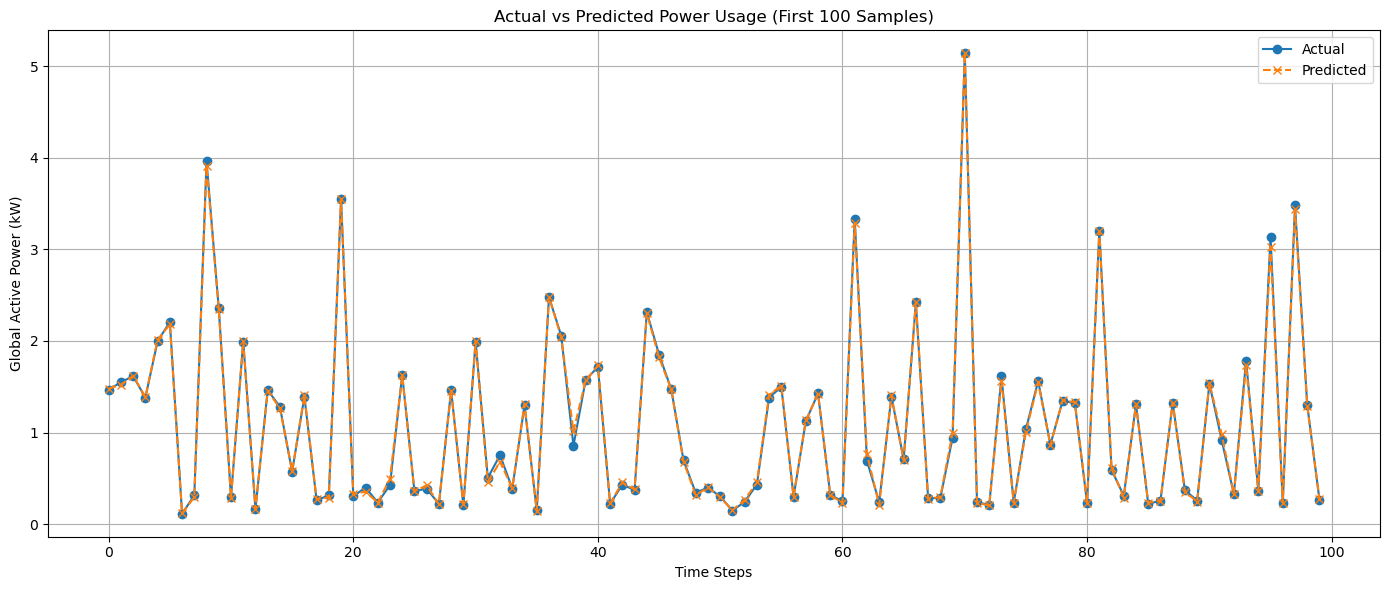

In [21]:
#Time Series Line Plot
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual[:100], label='Actual', marker='o', linestyle='-')
plt.plot(y_pred[:100], label='Predicted', marker='x', linestyle='--')
plt.title('Actual vs Predicted Power Usage (First 100 Samples)')
plt.xlabel('Time Steps')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV
# Define param_grid and run GridSearchCV on RandomForest or another model


In [23]:
print(df['Global_active_power'].dtype)

object


In [27]:
# Convert to numeric and coerce errors to NaN
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Drop NaNs
df = df.dropna(subset=['Global_active_power'])


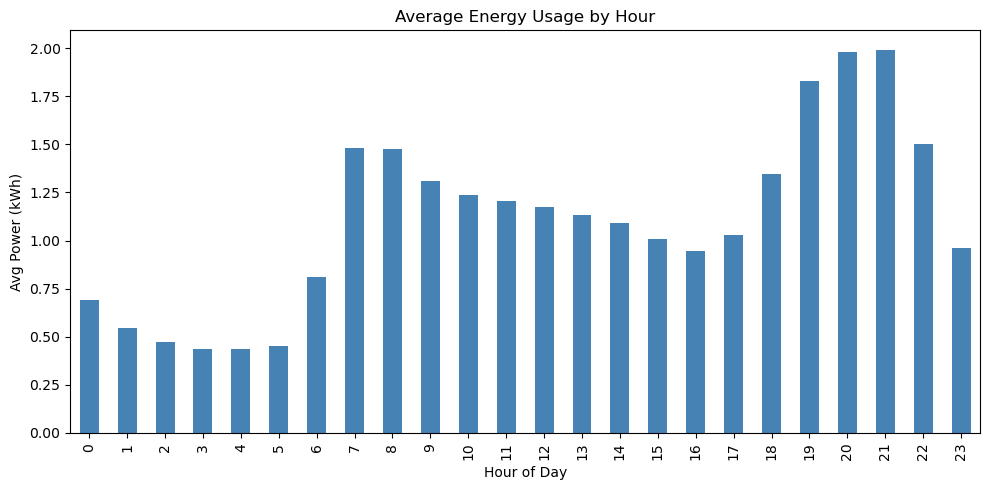

In [26]:
#Hourly Usage Patterns

hourly_avg = df.groupby(df.index.hour)['Global_active_power'].mean()

plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar', color='steelblue')
plt.title('Average Energy Usage by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Power (kWh)')
plt.tight_layout()
plt.show()

In [28]:
#Energy-Saving Recommendations

if hourly_avg.idxmax() >= 18:
    print("⚡ Tip: Peak usage occurs in the evening. Consider shifting laundry, water heating, etc., to mornings or midday.")
else:
    print("✅ Your usage pattern is already efficient — most consumption is outside peak hours.")


⚡ Tip: Peak usage occurs in the evening. Consider shifting laundry, water heating, etc., to mornings or midday.


In [ ]:
#Business use case 1 

# ⚡ Energy Management for Households

**Goal:** Monitor and optimize household energy consumption to reduce bills and promote efficient habits.

**Key Focus Areas:**
- Daily/weekly usage trends
- Appliance-level consumption
- Peak hour analysis & cost estimation

In [30]:
#Preprocessing (Code Cell)

# Convert to numeric and clean
cols = ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=cols, inplace=True)

# Combine Date & Time
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df.set_index('Datetime', inplace=True)
df.sort_index(inplace=True)

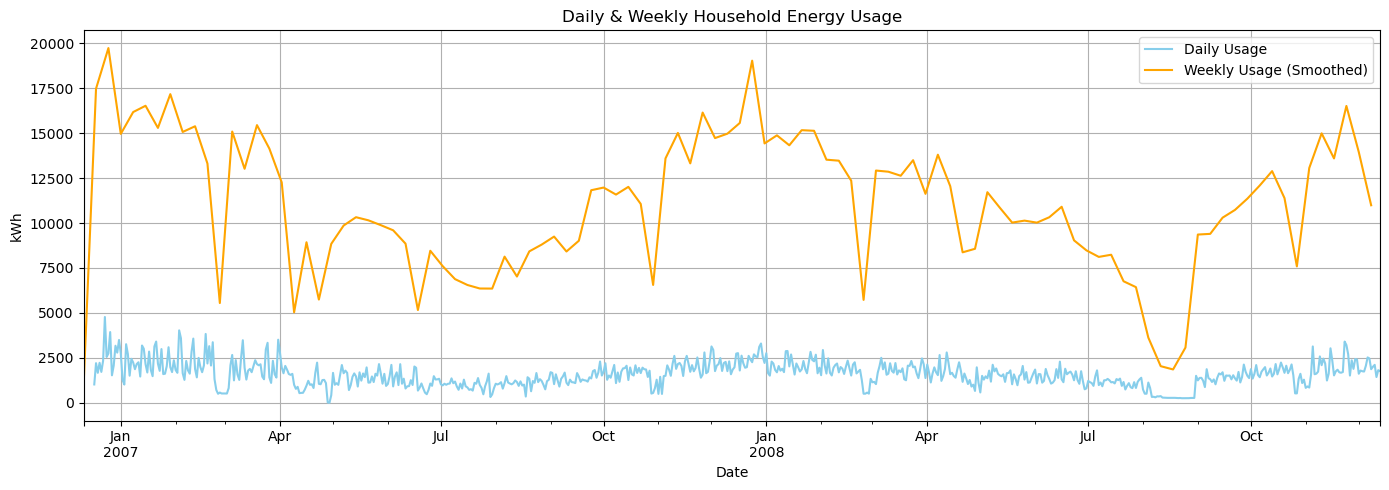

In [31]:
#1. 📊 Daily & Weekly Usage Trend

daily_usage = df['Global_active_power'].resample('D').sum()
weekly_usage = df['Global_active_power'].resample('W').sum()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
daily_usage.plot(label='Daily Usage', color='skyblue')
weekly_usage.plot(label='Weekly Usage (Smoothed)', color='orange')
plt.title("Daily & Weekly Household Energy Usage")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

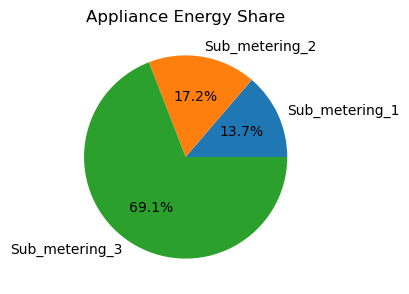

In [32]:
#2. 🔌 Appliance Breakdown via Sub Metering

#Sub_metering_1 = Kitchen
#Sub_metering_2 = Laundry
#Sub_metering_3 = Water heater & AC

sub_meters = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].resample('D').sum()

# Total share of energy
total_appliance = sub_meters.sum()
total_appliance_percent = (total_appliance / total_appliance.sum()) * 100

# Pie chart
total_appliance_percent.plot(kind='pie', autopct='%1.1f%%', figsize=(4, 6), title="Appliance Energy Share")
plt.ylabel('')
plt.tight_layout()
plt.show()

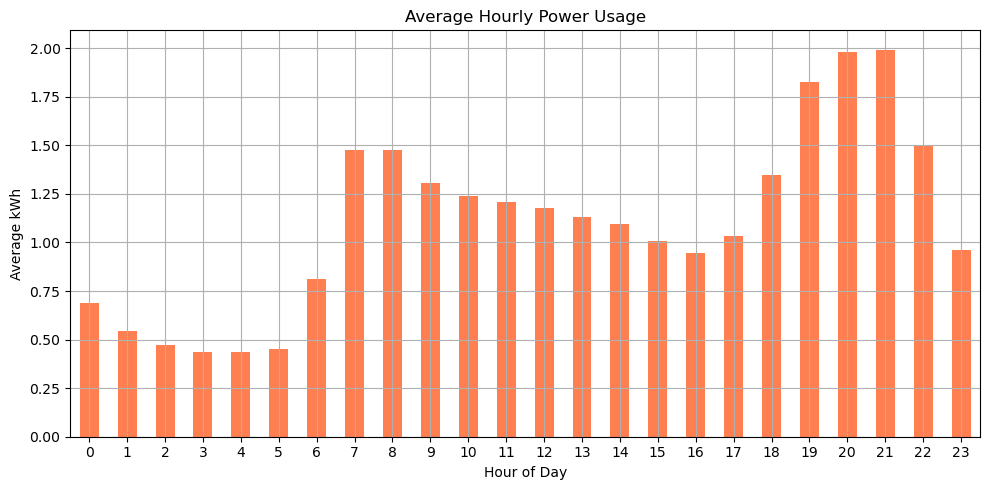

In [33]:
#3. ⏱️ Hourly Usage Pattern (Peak Detection)

hourly_avg = df.groupby(df.index.hour)['Global_active_power'].mean()

plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar', color='coral')
plt.title('Average Hourly Power Usage')
plt.xlabel('Hour of Day')
plt.ylabel('Average kWh')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

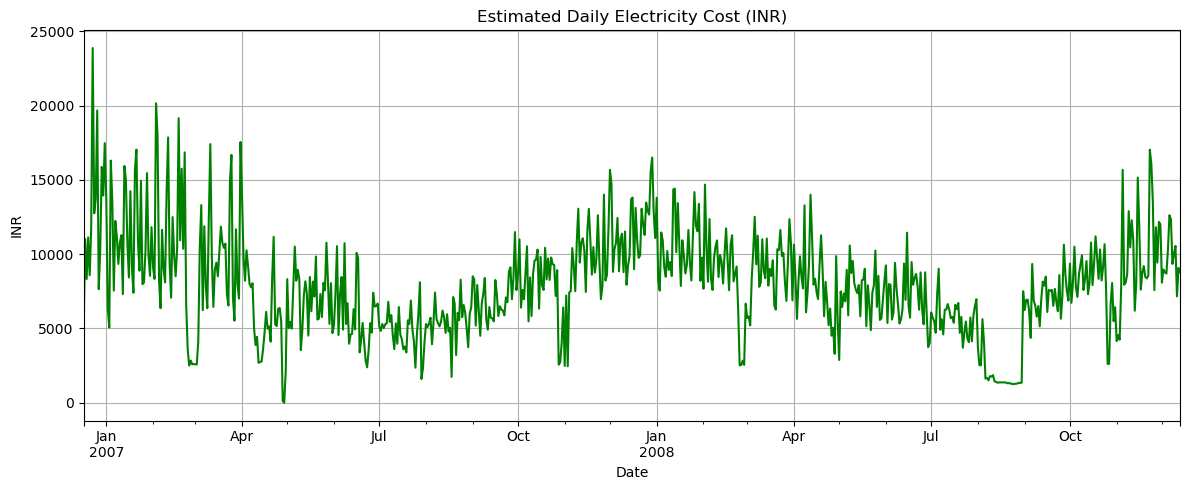

In [34]:
#4. 💰 Daily Cost Estimation

#Assume ₹5 per unit:

cost_per_kwh = 5
daily_cost = daily_usage * cost_per_kwh

plt.figure(figsize=(12, 5))
daily_cost.plot(color='green')
plt.title('Estimated Daily Electricity Cost (INR)')
plt.ylabel('INR')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Business use case 2 

# 📈 Demand Forecasting for Energy Providers

**Business Insight:**  
Our model forecasts demand 30 days ahead, enabling grid operators to prepare for high-demand days and optimize distribution.

**Key Analysis:**
- Prophet-based forecasting model
- RMSE / R² evaluation
- Visual demand trends

In [36]:
#1. Prepare Daily Power Usage Data

#We’ll resample Global_active_power by day, as Prophet works best with datetime-indexed time series.

import pandas as pd

# Ensure datetime index is set
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df.set_index('Datetime', inplace=True)
df.sort_index(inplace=True)

# Resample to daily total usage (kWh)
daily_usage = df['Global_active_power'].resample('D').sum().reset_index()
daily_usage.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for target value

In [37]:
#2. 🔮 Fit the Prophet Model

from prophet import Prophet

model = Prophet(daily_seasonality=True)
model.fit(daily_usage)

00:57:28 - cmdstanpy - INFO - Chain [1] start processing
00:57:29 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
#3. 📆 Forecast the Next 30 Days

# Create future dataframe (30 days ahead)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

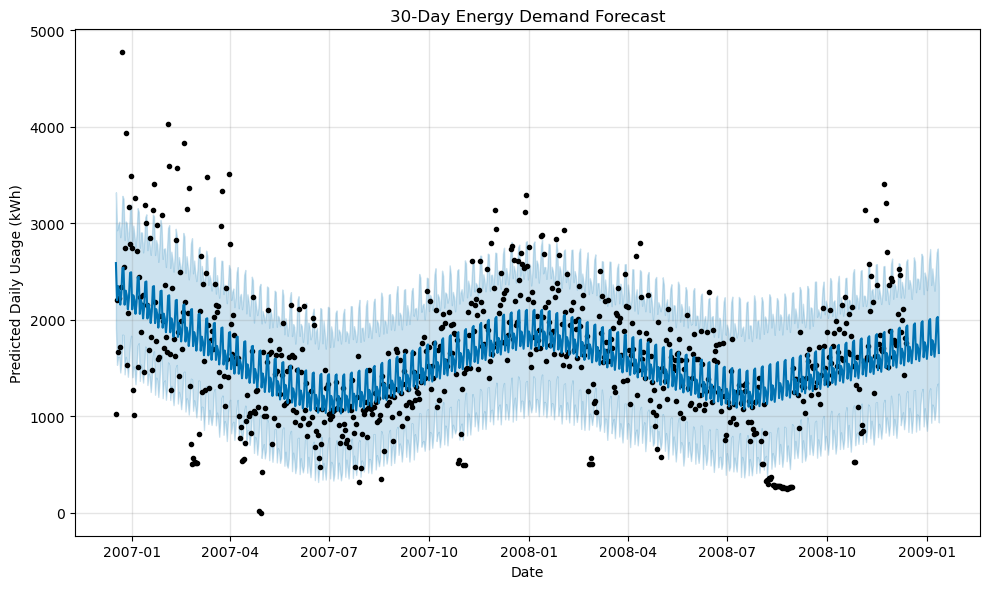

In [39]:
#4.  📈 Plot Forecasted Demand

import matplotlib.pyplot as plt

fig = model.plot(forecast)
plt.title("30-Day Energy Demand Forecast")
plt.xlabel("Date")
plt.ylabel("Predicted Daily Usage (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
#5. 🧠 Evaluate & Extract Insights

# Print top predicted day
spike_day = forecast.sort_values(by='yhat', ascending=False).iloc[0]
print(f"📌 Predicted demand spike: {spike_day['ds'].date()} — {spike_day['yhat']:.2f} kWh")

📌 Predicted demand spike: 2006-12-17 — 2588.50 kWh


In [41]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
748,2009-01-03,1992.057570,1251.197367,2620.907174
749,2009-01-04,2007.973138,1289.775214,2734.023958
750,2009-01-05,1633.831539,932.827648,2361.470925
751,2009-01-06,1789.356198,1121.683101,2533.166731
752,2009-01-07,1749.715340,1093.526847,2403.416474
753,2009-01-08,1617.124496,962.826531,2302.283742
754,2009-01-09,1747.312209,1057.688643,2484.869643
755,2009-01-10,2014.340526,1301.131881,2697.287952
756,2009-01-11,2030.256095,1338.139821,2739.572954
757,2009-01-12,1656.114496,936.823655,2344.248025


In [42]:
#6. Evaluate Accuracy with Historical

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Compare last 30 known values with predictions
actual = daily_usage['y'][-30:].values
predicted = forecast['yhat'][-30:].values

rmse = np.sqrt(mean_squared_error(actual, predicted))
r2 = r2_score(actual, predicted)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 647.12
R² Score: -0.63


In [ ]:
# Business use case 3

# 🚨 Anomaly Detection: Fault & Irregular Usage Monitoring

**Goal:** Detect abnormal energy patterns using statistical and ML techniques to identify faults, misuse, or unexpected surges.

**Techniques Used:**  
- Z-score on Global Active Power  
- Isolation Forest using multivariate features

In [43]:
#1. Prepare Data

# Ensure datetime index and clean numeric data
cols = ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Voltage']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=cols, inplace=True)

# Set datetime index
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df.set_index('Datetime', inplace=True)
df.sort_index(inplace=True)

# Resample to hourly
df_hourly = df[cols].resample('h').mean()

In [44]:
#2. Z-score Based Anomaly Detection

# Z-score method
rolling_mean = df_hourly['Global_active_power'].rolling(window=24).mean()
rolling_std = df_hourly['Global_active_power'].rolling(window=24).std()
z_scores = (df_hourly['Global_active_power'] - rolling_mean) / rolling_std

# Flag anomalies with Z-score
df_hourly['z_anomaly'] = (np.abs(z_scores) > 3).astype(int)

In [46]:
from sklearn.ensemble import IsolationForest

# Columns to use
cols = ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Voltage']

# ✅ Step 1: Create a clean subset (no NaNs)
df_clean = df_hourly[cols].dropna()

# ✅ Step 2: Train model only on clean data
model = IsolationForest(contamination=0.01, random_state=42)
preds = model.fit_predict(df_clean)

# ✅ Step 3: Create a column for all rows, default to 0 (normal)
df_hourly['iso_anomaly'] = 0

# ✅ Step 4: Fill in predictions for clean rows only
df_hourly.loc[df_clean.index, 'iso_anomaly'] = preds

# ✅ Step 5: Convert -1 (anomaly) → 1, and 1 (normal) → 0
df_hourly['iso_anomaly'] = df_hourly['iso_anomaly'].map({1: 0, -1: 1})

In [47]:
print(df_hourly['iso_anomaly'].value_counts())

iso_anomaly
0.0    17217
1.0      174
Name: count, dtype: int64


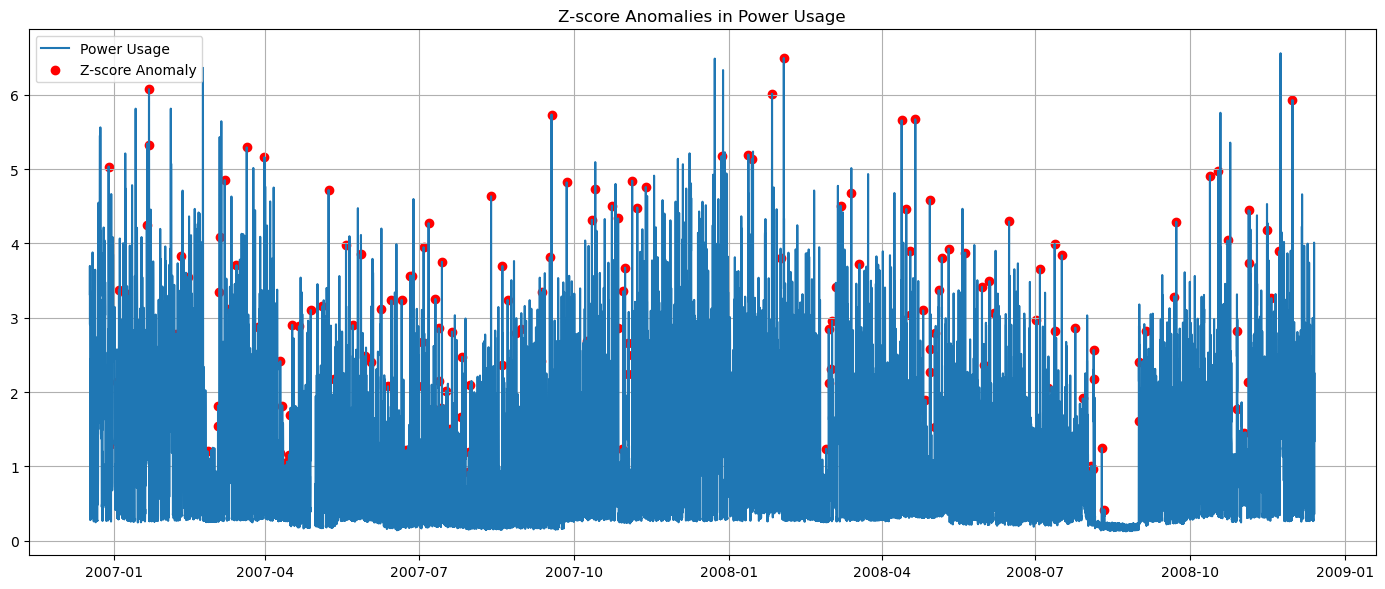

In [48]:
#3. Visualize Anomalies - 🔹 Z-score Plot:

plt.figure(figsize=(14, 6))
plt.plot(df_hourly.index, df_hourly['Global_active_power'], label='Power Usage')
plt.scatter(df_hourly[df_hourly['z_anomaly'] == 1].index,
            df_hourly[df_hourly['z_anomaly'] == 1]['Global_active_power'],
            color='red', label='Z-score Anomaly')
plt.title("Z-score Anomalies in Power Usage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

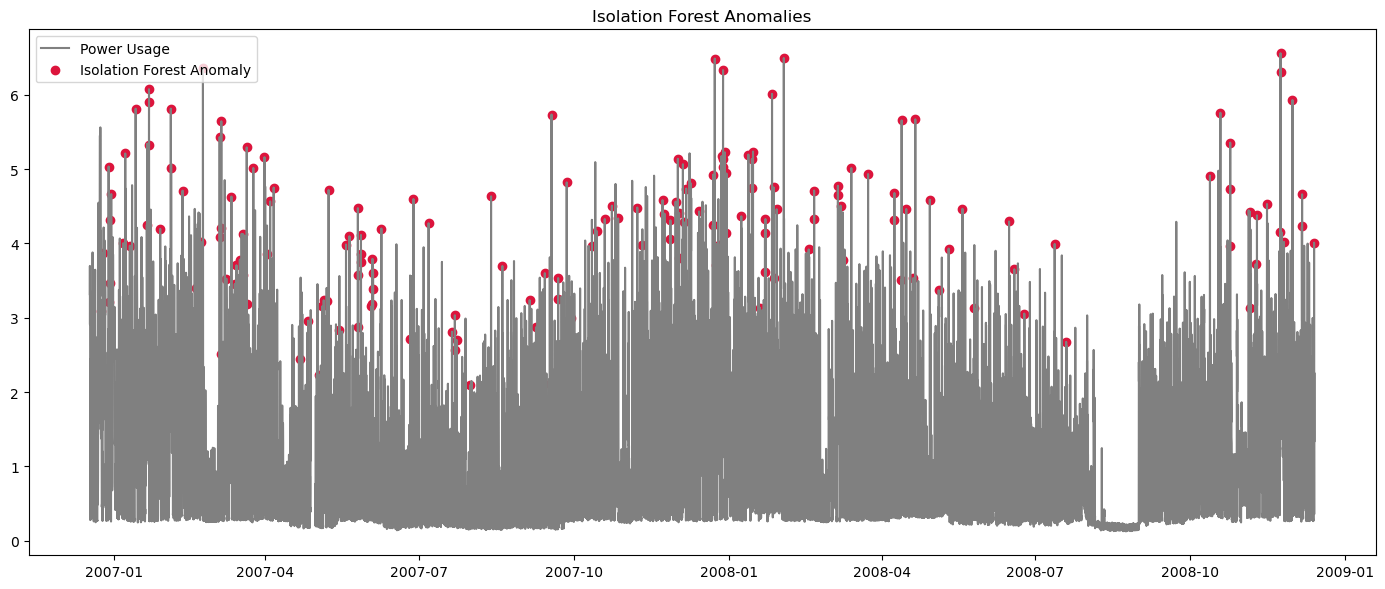

In [49]:
#4. 🔹 Isolation Forest Plot:

plt.figure(figsize=(14, 6))
plt.plot(df_hourly.index, df_hourly['Global_active_power'], color='gray', label='Power Usage')
plt.scatter(df_hourly[df_hourly['iso_anomaly'] == 1].index,
            df_hourly[df_hourly['iso_anomaly'] == 1]['Global_active_power'],
            color='crimson', label='Isolation Forest Anomaly')
plt.title("Isolation Forest Anomalies")
plt.legend()
plt.tight_layout()
plt.show()

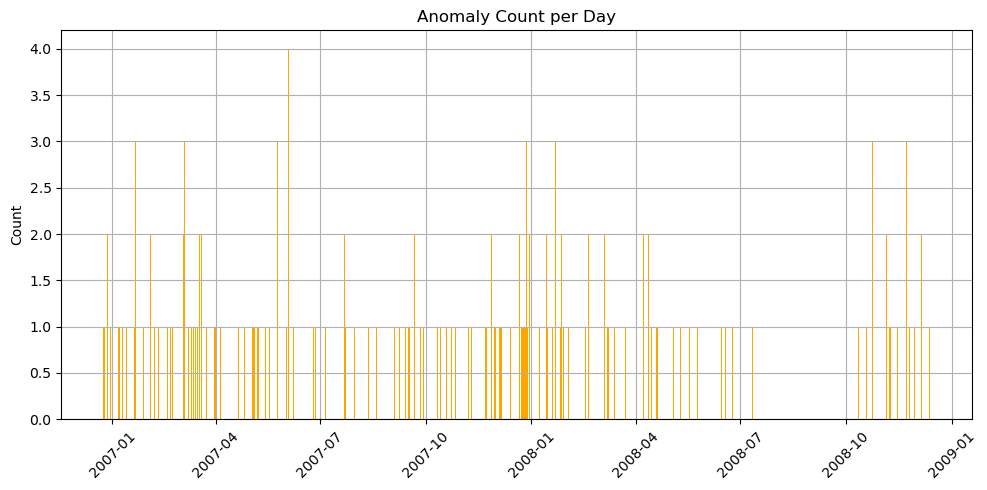

In [50]:
#5. Bar Chart: Anomalies per Day

daily_anomalies = df_hourly[df_hourly['iso_anomaly'] == 1].resample('D').count()['iso_anomaly']

plt.figure(figsize=(10, 5))
plt.bar(daily_anomalies.index, daily_anomalies, color='orange')
plt.title('Anomaly Count per Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [51]:
#6. Print Alert Tags

alerts = df_hourly[df_hourly['iso_anomaly'] == 1]
print("⚠️ Anomaly Alerts:")
display(alerts[['Global_active_power', 'Sub_metering_3']].head())

⚠️ Anomaly Alerts:


,Global_active_power,Sub_metering_3
Datetime,,
2006-12-24 15:00:00,3.096833,0.000000
2006-12-25 16:00:00,3.872833,0.000000
2006-12-28 21:00:00,5.035333,15.250000
2006-12-28 22:00:00,3.214200,0.000000
2006-12-29 20:00:00,3.471833,9.216667


In [ ]:
# Business use case 4

# 🔌 Smart Grid Integration: Real-Time Optimization

**Business Goal:**  
Predict peak load and grid stress. Use these predictions to simulate control actions like turning off high-load appliances to reduce grid pressure.

**What We’ll Do:**
- Create `is_peak` and `grid_stress` labels
- Train ML model to predict those tags
- Simulate control logic (e.g., auto shut-off of devices)

In [52]:
#1. Label Engineering (Create Targets)

# Create a label: 'is_peak' = 1 when Global_active_power is in the top 10%
peak_threshold = df_hourly['Global_active_power'].quantile(0.90)
df_hourly['is_peak'] = (df_hourly['Global_active_power'] >= peak_threshold).astype(int)

# Optional: Grid stress if power & voltage fluctuate simultaneously
df_hourly['grid_stress'] = (
    (df_hourly['Global_active_power'] > df_hourly['Global_active_power'].mean()) &
    (df_hourly['Voltage'].diff().abs() > 5)
).astype(int)

In [53]:
#2. Train ML Model to Predict Peak/Stress

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

features = ['Global_active_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
X = df_hourly[features]
y = df_hourly['is_peak']  # or 'grid_stress'

X = X.dropna()
y = y.loc[X.index]  # align indices

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🧠 Peak Prediction Accuracy: {accuracy * 100:.2f}%")

🧠 Peak Prediction Accuracy: 100.00%


In [54]:
# 3. Predict only on clean feature set - Assign predictions only to valid rows

predicted_peak = clf.predict(X)

# Create column defaulted to 0 or 'OK'
df_hourly['predicted_peak'] = 0
df_hourly['control_action'] = '✅ OK'

# Fill predicted values only where X was used
df_hourly.loc[X.index, 'predicted_peak'] = predicted_peak
df_hourly.loc[X.index, 'control_action'] = df_hourly.loc[X.index, 'predicted_peak'].apply(
    lambda x: '🛑 Turn Off AC' if x == 1 else '✅ OK'
)

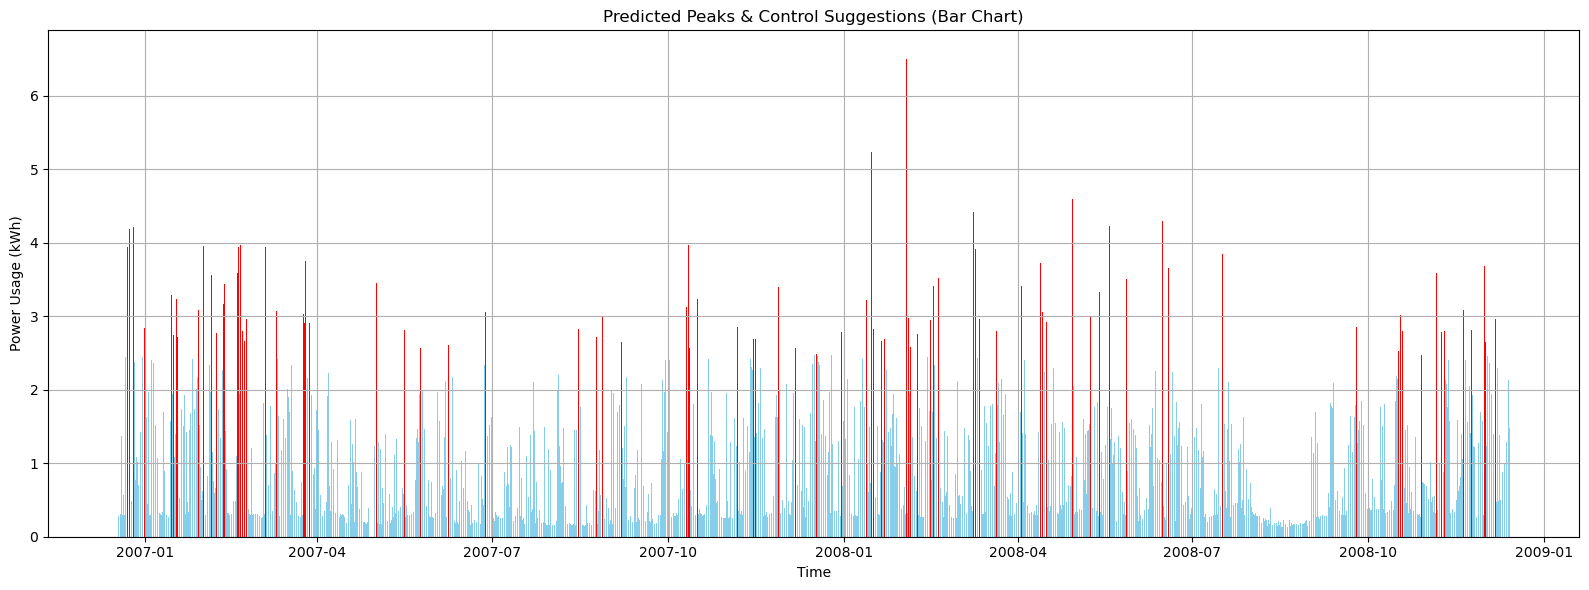

In [55]:
#4. Visual Overlay on Power Timeline

import matplotlib.pyplot as plt

# Create a color series: red for peaks, skyblue for normal
colors = df_hourly['predicted_peak'].map({1: 'red', 0: 'skyblue'})

# Plot as bar chart
plt.figure(figsize=(16, 6))
plt.bar(df_hourly.index, df_hourly['Global_active_power'], color=colors, width=0.03)

plt.title("Predicted Peaks & Control Suggestions (Bar Chart)")
plt.xlabel("Time")
plt.ylabel("Power Usage (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Business use case 5

# 🌍 Environmental Impact: Carbon Reduction from Smart Energy Optimization

**Business Goal:**  
Estimate CO₂ savings after implementing energy-saving strategies like peak avoidance and efficient usage.

We’ll:
- Estimate CO₂ based on usage
- Compare before vs after optimization
- Break down savings by appliance category

In [56]:
#1. Estimate CO₂ Emissions
#⚡ Standard: 1 kWh ≈ 0.82 kg CO₂ (you can adjust this based on your region)

# Conversion factor: 1 kWh ≈ 0.82 kg of CO₂ emitted
co2_per_kwh = 0.82

# Calculate daily energy usage
daily_usage = df_hourly['Global_active_power'].resample('D').sum()

# Estimate daily CO₂
daily_co2 = daily_usage * co2_per_kwh

# Simulate 12% savings after optimization
optimized_co2 = daily_co2 * 0.88

# Create before-after comparison
co2_comparison = pd.DataFrame({
    'Before Optimization': daily_co2,
    'After Optimization': optimized_co2
})

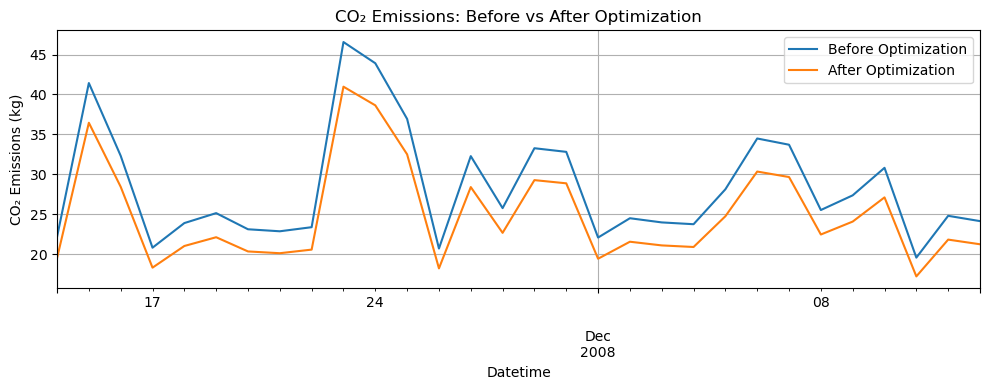

In [57]:
#2. Plot Before/After Comparison

co2_comparison.tail(30).plot(kind='line', figsize=(10, 4), title="CO₂ Emissions: Before vs After Optimization")
plt.ylabel("CO₂ Emissions (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()

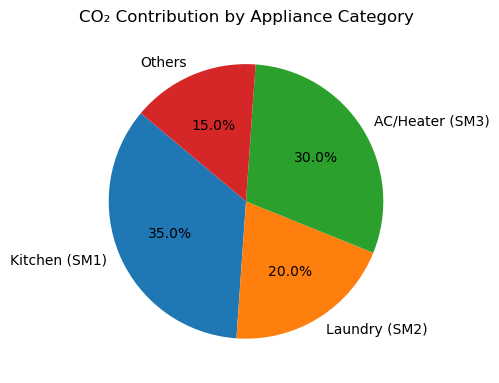

In [58]:
#3. Pie Chart: Contribution by Appliance (Simulated)

# Simulated contribution breakdown (adjust these based on sub_metering totals)
labels = ['Kitchen (SM1)', 'Laundry (SM2)', 'AC/Heater (SM3)', 'Others']
contributions = [35, 20, 30, 15]  # in %

plt.figure(figsize=(5, 7))
plt.pie(contributions, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("CO₂ Contribution by Appliance Category")
plt.tight_layout()
plt.show()